# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Project Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

We will analyze the review text(analyze the Sentiment) with various NLP technique to predict the score/rating. 

####  NLP Objective:
1) We employ various tokenization techniques and machine learning models for sentiment analysis on text data. We also evaluate and compare the performance of different models over our dataset. 
2) The analysis includes addressing challenges associated with imbalanced datasets and assessing the impact of advanced tokenization methods, such as BERT, on model performance in natural language processing tasks.

<b> Approach: </b>
* We aim to achieve this objective by utilizing multiple tokenization techniques, fine-tuning pretrained BERT model and training different machine learning algorithms, ensuring a comprehensive evaluation of model performance and the practical applicability of advanced tokenization methods.


DistilBERT’s 66 million parameters make it 40% smaller and 60% faster than BERT-base, while retaining more than 95% of BERT’s performance

#  Reading Data

## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the csv dataset.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install transformers
!pip install sentence_transformers 
!pip install bs4
!pip install lxml
!pip install torch==1.9.1+cpu torchvision==0.10.1+cpu torchaudio==0.9.1 -f https://download.pytorch.org/whl/cpu/torch_stable.html

^C
  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow_hub-0.14.0-py2.py3-none-any.whl (90 kB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/b7/db/4d37359e2c9cf8bf071c08b8a6f7374648a5ab2e76e2e22e3b808f81d507/numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata
  Using cached numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata (5.7 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached numpy-1.25.2-cp310-cp310-win_amd64.whl (15.6 MB)


  Using cached bs4-0.0.1-py3-none-any.whl
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.9.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.12.0, 1.12.0+cpu, 1.12.1, 1.12.1+cpu, 1.13.0, 1.13.0+cpu, 1.13.1, 1.13.1+cpu, 2.0.0, 2.0.0+cpu, 2.0.1, 2.0.1+cpu)
ERROR: No matching distribution found for torch==1.9.1+cpu


In [9]:
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/34/1a/cd4f39dcd28628bf69d2a6642aea3854f2de877196c737bf08e4ef3ca372/spacy-3.6.1-cp310-cp310-win_amd64.whl.metadata
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/ed/9d/d62d12e3ecc6f99eddea6289413669a905d2ebb15cf9fe075336ca6cceaa/murmurhash-1.0.10-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/51/12/4aa9eec680c6d12b2275d479e159c3d063d7c757175063dd45386e15b39d/cymem-2.0.8-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.


In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string

import pickle

from tqdm import tqdm
import os
import tensorflow

In [13]:
home_folder = os.getcwd()
home_folder

data = pd.read_csv('Reviews.csv')
print(data.columns)
print(data.shape)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
(568454, 10)


In [14]:
data['UserId'].duplicated().sum()

312395

##  Data Cleaning: Deduplication

The reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.

In [15]:
# using SQLite Table to read data.
#con = sqlite3.connect(/content/database.sqlite) 

# filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
# SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000, will give top 500000 data points
# you can change the number to any other number based on your computing power

# filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000""", con) 
# for tsne assignment you can take 5k data points

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
def remap_score(data):
    # Drop duplicated rows by 'UserId'
    data = data.drop_duplicates(subset='UserId')
    
    # Filter out rows where 'Score' is not 3
    df_selected = data[data['Score'] != 3]
    
    # Shuffle the DataFrame
    shuffled_df = df_selected.sample(frac=1, random_state=42)  # Shuffle with a random seed for reproducibility

    # Take the top 5000 rows
    filtered_data = shuffled_df.head(5000)

    # Define a mapping function to change scores
    def partition(score):
        # If score is less than 3, consider it as positive (1), otherwise negative (0)
        return 1 if score < 3 else 0

    # Apply the mapping function to the 'Score' column to remap target values
    positiveNegative = filtered_data['Score'].map(partition) 
    
    # Update the 'Score' column with the remapped values
    filtered_data['Score'] = positiveNegative
    
    # Print the number of data points and display the first 3 rows
    print("Number of data points in our data:", filtered_data.shape)
    
    
    return filtered_data

# Call the function to remap target values and store the result in 'filtered_data'
filtered_data = remap_score(data)
filtered_data.head(3)

Number of data points in our data: (5000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
99613,99614,B000COCLYM,A1UVUYH1HXDG5U,Gail P. Hamilton,0,0,0,1252454400,This stuff really works!!!!,"As an animal caregiver, it was a pleasure to c..."
316109,316110,B000AXSFZY,A8UC5P67GMU7W,TAB,3,3,0,1200009600,Yummy and simple...,"This is surprisingly good, especially consider..."
181512,181513,B003M60630,AJVDF84AZB2OU,Faith,0,0,0,1351123200,Celestial Iced Black Tea,This is my favorite brand of black iced tea. I...


#  Exploratory Data Analysis

In [16]:
def clean_data(filtered_data):
    filtered_data['Time'] = filtered_data['Time'].astype(int)
    
    #Checing if HelpfulnessNumerator is greater than HelpfulnessDenominator and dropping those rows 
    filtered_data=filtered_data[filtered_data.HelpfulnessNumerator<=filtered_data.HelpfulnessDenominator]

    #Sorting data according to ProductId in ascending order
    sorted_data=filtered_data.sort_values('ProductId',axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

    #Deduplication of entries
    final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
    return final
    
    
final = clean_data(filtered_data)
final.shape

(5000, 10)

## Balanced or Imbalanced

In [17]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(5000, 10)


Score
0    4195
1     805
Name: count, dtype: int64

#  Preprocessing

##  Preprocessing Review Text

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [18]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

Please do not waste your money. This Fly trap is absolutely useless. I bought two of  this product for the kitchen, we always BBQ and go in and out by the Pool and fly's get in the House. We have started to make jokes about his product not ONE Fly so far has gone on both of them since i hang it up 2 weeks ago :) Terrible Product!
"You are indeed, a twisted pretzel of a man!" croaked my lovely, at least in my own eyes anyway, wife Dorothy D. Pretzel. After that it was love at first bite. Even though wifey strictly watches my diet for me, I like to sneak a snack of these delicious pretzels when she's not looking. I'm a rebel, what can I say? In fact, I've added these to my wishlist, along with a few other items you can pick up for if should you so desire. Now if you don't mind, Dorothy's calling for me, she needs pumiced again. Life is good.
I have NEVER tasted a substance like this that is so addictive.  I have eaten it on bread, pretzels, crackers, chips, veggies, fruit....this mustard

In [19]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

Please do not waste your money. This Fly trap is absolutely useless. I bought two of  this product for the kitchen, we always BBQ and go in and out by the Pool and fly's get in the House. We have started to make jokes about his product not ONE Fly so far has gone on both of them since i hang it up 2 weeks ago :) Terrible Product!


In [20]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

Please do not waste your money. This Fly trap is absolutely useless. I bought two of  this product for the kitchen, we always BBQ and go in and out by the Pool and fly's get in the House. We have started to make jokes about his product not ONE Fly so far has gone on both of them since i hang it up 2 weeks ago :) Terrible Product!
"You are indeed, a twisted pretzel of a man!" croaked my lovely, at least in my own eyes anyway, wife Dorothy D. Pretzel. After that it was love at first bite. Even though wifey strictly watches my diet for me, I like to sneak a snack of these delicious pretzels when she's not looking. I'm a rebel, what can I say? In fact, I've added these to my wishlist, along with a few other items you can pick up for if should you so desire. Now if you don't mind, Dorothy's calling for me, she needs pumiced again. Life is good.
I have NEVER tasted a substance like this that is so addictive.  I have eaten it on bread, pretzels, crackers, chips, veggies, fruit....this mustard

In [21]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

I have NEVER tasted a substance like this that is so addictive.  I have eaten it on bread, pretzels, crackers, chips, veggies, fruit....this mustard is in a class all of it is own.  I do not even think of it as a mustard...it is more like a food frosting.  Once you try this, you will be hooked.  It is not hot, it is sweetly spiced...I cannot even describe this...but I can tell you, that I could eat it by the spoonfuls.  I never write reviews, but I HAD to on this one.  We bought it on a recent trip to North Carolina and devoured a jar in one week.  Do yourself a favor and get some of this stuff, you will be SOOO glad you did!  My next jar, I will be mixing some curry into it and drench it on Thai noodles...


In [23]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Please do not waste your money. This Fly trap is absolutely useless. I bought two of  this product for the kitchen, we always BBQ and go in and out by the Pool and fly's get in the House. We have started to make jokes about his product not ONE Fly so far has gone on both of them since i hang it up  weeks ago :) Terrible Product!


In [24]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

I have NEVER tasted a substance like this that is so addictive I have eaten it on bread pretzels crackers chips veggies fruit this mustard is in a class all of it is own I do not even think of it as a mustard it is more like a food frosting Once you try this you will be hooked It is not hot it is sweetly spiced I cannot even describe this but I can tell you that I could eat it by the spoonfuls I never write reviews but I HAD to on this one We bought it on a recent trip to North Carolina and devoured a jar in one week Do yourself a favor and get some of this stuff you will be SOOO glad you did My next jar I will be mixing some curry into it and drench it on Thai noodles 


In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [26]:
# Combining all the above stundents 
from tqdm import tqdm

def preprocess_text_data(final):
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(final['Text']):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        #sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        preprocessed_reviews.append(sentance.strip())
           
    return preprocessed_reviews

preprocessed_reviews = preprocess_text_data(final)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4923.16it/s]


In [27]:
print(preprocessed_reviews[800])
final['preprocessed_reviews'] = preprocessed_reviews
new_df= final[['Score','preprocessed_reviews']].copy()

doctor kracker seedlanders nutty taste, stay crisp plastic "cookie jar," satisfyingly crunchy. good cheese. not many carbs.


In [28]:
new_df['Score'].value_counts()

Score
0    4195
1     805
Name: count, dtype: int64

##  Handle the imbalanced data

**To balance the unbalanced dataset until we reached a 50-50 class distribution we are upsampling the minority class**

In [29]:
from imblearn.over_sampling import RandomOverSampler
def oversample_data(new_df):
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(new_df['preprocessed_reviews'].values.reshape(-1, 1), new_df['Score'].values.reshape(-1, 1))
    
    return X_over, y_over
    
    
X_over, y_over = oversample_data(new_df)
y_over.shape

(8390,)

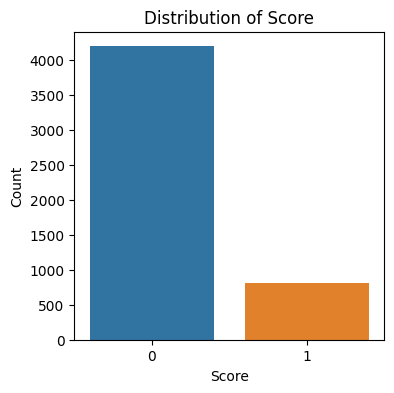

After oversampling


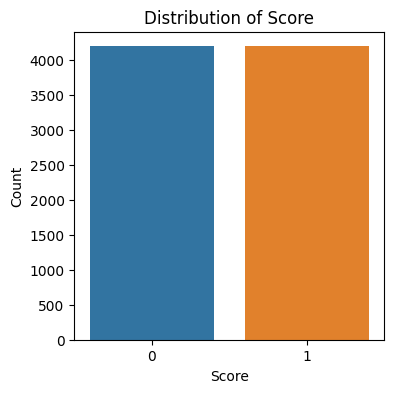

In [30]:
y_label= new_df['Score']
X_label = new_df['preprocessed_reviews']

def plot_target(new_df):
    plt.figure(figsize=(4, 4))  # Set the figure size
    
    # Create a count plot of the 'Score' column
    sns.countplot(data=new_df, x='Score')

    # Set plot labels and title
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.title('Distribution of Score')

    # Show the plot
    plt.show()
    
plot_target(new_df)


print("After oversampling")
y_over_df = pd.DataFrame({'Score': y_over.flatten()}) 
plot_target(y_over_df)

##  Split the data to train, cv, test

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.

**Test, Train, split for imbalanced data**

In [31]:
y_label= new_df['Score']
X_label = new_df['preprocessed_reviews']
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.33, stratify=y_label)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.33, stratify=y_label)\nX_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)\n'

**Test, Train, split for the balanced data**

In [32]:
from sklearn.model_selection import train_test_split

def prepare_train_test_data(X_over,y_over):
    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, stratify=y_over)
    X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

    #To convert ndarray to series, which will be passed as input to featurizer
    #the X_train passed is a ndarray, we convert into pandas series
    X_train = pd.Series(X_train.flatten())
    y_train = pd.Series(y_train.flatten())
    X_cv = pd.Series(X_cv.flatten())
    y_cv = pd.Series(y_cv.flatten())
    X_test = pd.Series(X_test.flatten())
    y_test = pd.Series(y_test.flatten())
    
    return X_train, y_train,X_cv,y_cv,X_test,y_test


X_train, y_train,X_cv,y_cv,X_test,y_test = prepare_train_test_data(X_over,y_over)


#  Featurization

## TF-IDF

In [42]:
def vectorize_tf_idf(X_train, X_cv,X_test ):
    tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
    tf_idf_vect.fit(X_train)
  
    print('='*50)

    x_final_tf_idf = tf_idf_vect.transform(X_train)

    cv_final_tf_idf = tf_idf_vect.transform(X_cv)
    final_tf_idf = tf_idf_vect.transform(X_test)
    print("the type of count vectorizer ",type(final_tf_idf))
    print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

    return x_final_tf_idf, cv_final_tf_idf,final_tf_idf


x_final_tf_idf, cv_final_tf_idf,final_tf_idf = vectorize_tf_idf(X_train, X_cv,X_test )

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2769, 2755)
the number of unique words including both unigrams and bigrams  2755


##  Sentence Tranfromer

In [55]:
#https://www.sbert.net/docs/pretrained_models.html
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

sent_transformer_model = SentenceTransformer('intfloat/e5-base')
embeddings = sent_transformer_model.encode(sentences)
print(embeddings)

loading configuration file C:\Users\padma/.cache\torch\sentence_transformers\intfloat_e5-base\config.json
Model config BertConfig {
  "_name_or_path": "C:\\Users\\padma/.cache\\torch\\sentence_transformers\\intfloat_e5-base\\",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.33.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file C:\Users\padma/.cache\torch\sentence_transformers\intfloat_e5-base\model.safetensors
All model checkpoint weights were used when initi

[[-0.04683401  0.04193902 -0.04535106 ...  0.03809198  0.01369486
   0.06179129]
 [-0.03815178  0.0477583  -0.00156533 ...  0.03771496  0.04258016
   0.06002636]]


In [56]:
def vectorize_w_sentence_transformer(X_train, X_cv,X_test):
    # Encode X_train
    embeddings_train = sent_transformer_model.encode(X_train, convert_to_tensor=True)
    
    # Encode X_cv
    embeddings_cv = sent_transformer_model.encode(X_cv, convert_to_tensor=True)
    
    # Encode X_test
    embeddings_test = sent_transformer_model.encode(X_test, convert_to_tensor=True)

    return embeddings_train,embeddings_cv,embeddings_test

embeddings_train,embeddings_cv,embeddings_test =  vectorize_w_sentence_transformer(X_train, X_cv,X_test)

## Using DistilBertTokenizer

In [34]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout, Input
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertModel, DistilBertConfig
from tensorflow.keras import regularizers
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel,DistilBertTokenizer,DistilBertConfig

# To Instantiate DistilBERT tokenizer...we use the Fast version to optimize runtime
bert_tokenizer =  DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

#We try to tokenize the 1st review text, to check how it works
text=X_train
labels=y_train
print(len(text),len(labels))

bert_tokenizer.tokenize(text[0])

loading file vocab.txt from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\vocab.txt
loading file tokenizer.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_d

3766 3766


['pathetic',
 'excuse',
 'punjabi',
 'ch',
 '##hol',
 '##le',
 '.',
 'powered',
 'ga',
 '##ram',
 'mas',
 '##ala',
 ',',
 'oil',
 '##y',
 '.',
 'read',
 'earlier',
 'reviews',
 'bought',
 'this',
 '.',
 '.',
 '.',
 'but',
 'mistake',
 '.']

###  Encode/ decode a text using Bert Tokenizer

In [35]:
bert_inp=bert_tokenizer.encode_plus(text[0],add_special_tokens = True,max_length =64,pad_to_max_length = True,truncation=True)
print(bert_inp)
print("****Attention mask below**")
print(bert_inp['attention_mask'])

bert_tokenizer.decode(bert_inp['input_ids'])


{'input_ids': [101, 17203, 8016, 17498, 10381, 14854, 2571, 1012, 6113, 11721, 6444, 16137, 7911, 1010, 3514, 2100, 1012, 3191, 3041, 4391, 4149, 2023, 1012, 1012, 1012, 2021, 6707, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
****Attention mask below**
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'[CLS] pathetic excuse punjabi chholle. powered garam masala, oily. read earlier reviews bought this... but mistake. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

###  Prepare the tensor for DBert Train, test and cv

In [36]:
#Preparing the input for BERT , we pass text and ylabel as input 
max_len=64

# Define a function to prepare input tensors for BERT
def prepare_tensor(input_text, y_label):
    input_ids = []          # List to store input IDs
    attention_masks = []    # List to store attention masks
    
    # Initialize the BERT tokenizer
    bert_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
    
    # Loop through each input text
    for ip in input_text:
        # Encode the input text using the BERT tokenizer
        dbert_inps = bert_tokenizer.encode_plus(
            ip,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            truncation=True
        )
        
        # Append the input IDs and attention mask to their respective lists
        input_ids.append(dbert_inps['input_ids'])
        attention_masks.append(dbert_inps['attention_mask'])
    
    # Convert the lists to NumPy arrays
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(y_label)  # Assuming y_label is a list or array of labels

    return input_ids, attention_masks, labels


Get the input_ids, Attention mask, labels for train, cv and test and store in pickle file to build the model

In [38]:
train_inp,train_mask,train_label=prepare_tensor(X_train, y_train)
cv_inp,cv_mask,cv_label=prepare_tensor(X_cv, y_cv)
test_inp,test_mask,test_label=prepare_tensor(X_test, y_test)

print('Train inp shape {} , Train label shape {} , Train attention mask shape {} \n'.format(train_inp.shape,train_label.shape,train_mask.shape))
print('cv inp shape {} , cvlabel shape {} , cv attention mask shape {} \n'.format(cv_inp.shape,cv_label.shape,cv_mask.shape))
print('Test inp shape {} , Test label shape {} , Test attention mask shape {} \n'.format(test_inp.shape,test_label.shape,test_mask.shape))

loading file vocab.txt from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\vocab.txt
loading file tokenizer.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_d

Train inp shape (3766, 64) , Train label shape (3766,) , Train attention mask shape (3766, 64) 

cv inp shape (1855, 64) , cvlabel shape (1855,) , cv attention mask shape (1855, 64) 

Test inp shape (2769, 64) , Test label shape (2769,) , Test attention mask shape (2769, 64) 



#  KNN/BERT/Random Forest For Sentence/Review Analysis 

<h4>We have 3 sets of data </h4>

* SET 1 - TFIdf Tokenized         
* SET 2 - Sentence Transformer Tokenized      
* SET 3 - DistilBertTokenizer Tokenized    

1) We will train SET 1 and SET 2 on KNN Kd-Tree which serves as a baseline model
2) We will train SET 2 on RandomForestClassifier
3) We will train SET 3 on TFDistilBertModel
4) Finally we compare the performance of all the models

In [43]:
!pip install prettytable

  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/4d/81/316b6a55a0d1f327d04cc7b0ba9d04058cb62de6c3a4d4b0df280cbe3b0b/prettytable-3.9.0-py3-none-any.whl.metadata
  Using cached prettytable-3.9.0-py3-none-any.whl.metadata (26 kB)
Using cached prettytable-3.9.0-py3-none-any.whl (27 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.4.0 requires sqlalchemy>=0.6.7, which is not installed.
ipython-sql 0.4.0 requires sqlparse, which is not installed.
ipython-sql 0.4.0 requires prettytable<1, but you have prettytable 3.9.0 which is incompatible.


In [144]:
#Roc curve
#https://www.kaggle.com/surentharbe/credit-card-fraud-detection-using-svm-100-auprc
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Hyper parameter", "AUC"]

##  Applying KNN kd-tree

In [87]:
#creating a method for KNN which will be reused by all the algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
def Train_data(X_train,y_train, X_cv, y_cv,algorithm):
    train_auc = []
    cv_auc = []
    K = [1, 5, 10, 15, 21, 31, 41, 51, 61,71, 81, 91]
    for i in K:
        neigh = KNeighborsClassifier(n_neighbors=i, algorithm=algorithm)
        neigh.fit(X_train, y_train)
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs
        y_train_pred =  neigh.predict_proba(X_train)[:,1]
        y_cv_pred =  neigh.predict_proba(X_cv)[:,1]

        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

    sns.set_style("whitegrid");
    plt.plot(K, train_auc, label='Train AUC')
    plt.scatter(K, train_auc, label='Train AUC')
    plt.plot(K, cv_auc, label='CV AUC')
    plt.scatter(K, cv_auc, label='CV AUC')
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

In [140]:
def Test_Data(X_train, y_train,X_test,y_test, algorithm,best_k, vectorizer):
    neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm=algorithm)
    neigh.fit(X_train, y_train)
    
    # Save the trained model
    model_name = algorithm+"_"+vectorizer+".joblib"
    model_save_path = os.path.join(BASE_FOLDER, model_name)
    joblib.dump(neigh, model_save_path)


    train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

    sns.set_style("whitegrid");
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title(f"ERROR PLOTS for KNN {vectorizer}")
    plt.show()

    print("="*100)
    
    print("AUC **",str(auc(test_fpr, test_tpr)))

    table.add_row([vectorizer, algorithm, best_k, str(auc(test_fpr, test_tpr))])
    from sklearn.metrics import confusion_matrix
    print("Train confusion matrix")
    print(confusion_matrix(y_train, neigh.predict(X_train)))
    print("Test confusion matrix")
    print(confusion_matrix(y_test, neigh.predict(X_test)))
    
    print()
    print("Classification Report")
    print(classification_report(y_test, neigh.predict(X_test), labels=[0, 1]))

### Applying KNN kd-tree on TFIDF,<font color='red'> SET 1</font>

  File "C:\Users\padma\anaconda3\envs\nlp\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


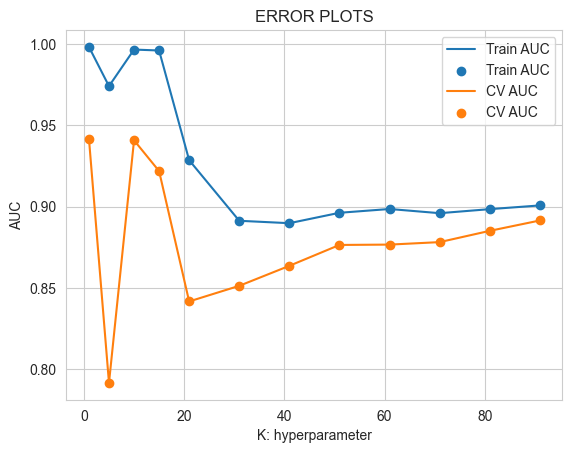

In [89]:
# Please write all the code with proper documentation
Train_data(x_final_tf_idf,y_train,cv_final_tf_idf,y_cv,'kd_tree')

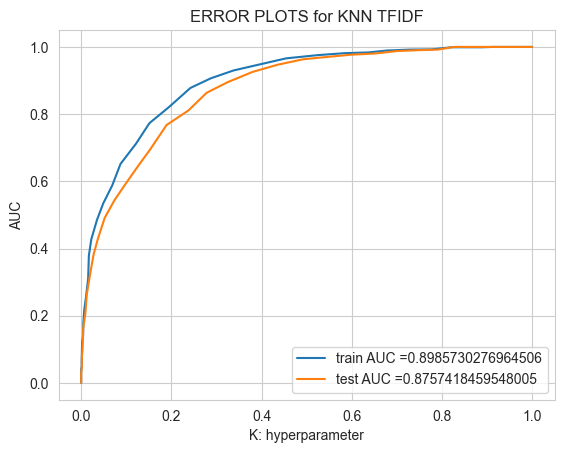

AUC ** 0.8757418459548005
Train confusion matrix
[[1598  285]
 [ 427 1456]]
Test confusion matrix
[[1122  262]
 [ 322 1063]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1384
           1       0.80      0.77      0.78      1385

    accuracy                           0.79      2769
   macro avg       0.79      0.79      0.79      2769
weighted avg       0.79      0.79      0.79      2769



In [145]:
Test_Data(x_final_tf_idf, y_train, final_tf_idf, y_test,'kd_tree', best_k=61,vectorizer="TFIDF")

###  Applying KNN kd-tree on Sentence Transformer,<font color='red'> SET 2</font>

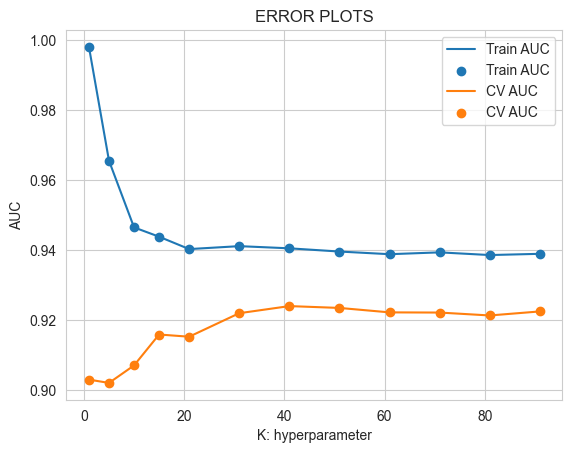

In [93]:
Train_data(embeddings_train,y_train,embeddings_cv,y_cv,'kd_tree')

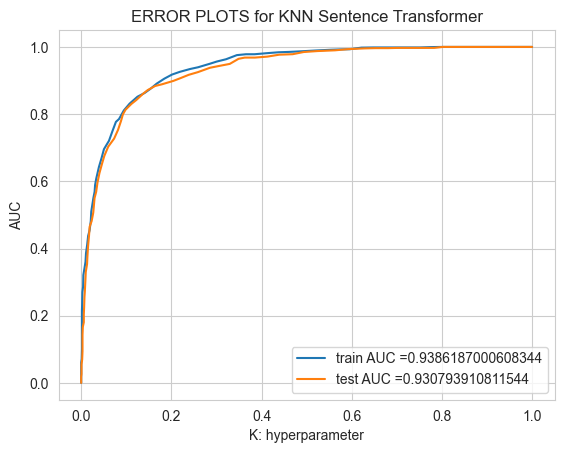

AUC ** 0.930793910811544
Train confusion matrix
[[1568  315]
 [ 206 1677]]
Test confusion matrix
[[1157  227]
 [ 161 1224]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1384
           1       0.84      0.88      0.86      1385

    accuracy                           0.86      2769
   macro avg       0.86      0.86      0.86      2769
weighted avg       0.86      0.86      0.86      2769



In [146]:
Test_Data(embeddings_train, y_train, embeddings_test, y_test,'kd_tree', best_k=81,vectorizer="Sentence Transformer")

## Random Forest'

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import joblib

def Train_RF_data(X_train, y_train, X_cv, y_cv, n_estimators_list, max_depth_list, n_iter=10):
    train_auc_list = []  # List to store train AUC for each max_depth
    cv_auc_list = []  # List to store CV AUC for each max_depth

    for max_depth in max_depth_list:
        train_auc = []  # Reset train_auc for each max_depth
        cv_auc = []  # Reset cv_auc for each max_depth

        for n_estimators in n_estimators_list:
            param_dist = {
                'n_estimators': [n_estimators],
                'max_depth': [max_depth],
            }

            rf_classifier = RandomForestClassifier()

            # RandomizedSearchCV
            rf_random = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=n_iter, cv=3, n_jobs=-1)

            rf_random.fit(X_train, y_train)

            # Fit the final model with the best hyperparameters
            best_rf_classifier = RandomForestClassifier(n_estimators=rf_random.best_params_['n_estimators'],
                                                        max_depth=rf_random.best_params_['max_depth'])
            best_rf_classifier.fit(X_train, y_train)

            y_train_pred = best_rf_classifier.predict_proba(X_train)[:, 1]
            y_cv_pred = best_rf_classifier.predict_proba(X_cv)[:, 1]

            train_auc.append(roc_auc_score(y_train, y_train_pred))
            cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

        train_auc_list.append(train_auc)
        cv_auc_list.append(cv_auc)

    # Plotting code outside the loops
    for i, max_depth in enumerate(max_depth_list):
        plt.plot(n_estimators_list[:len(train_auc_list[i])], train_auc_list[i], label=f'Train AUC (Max Depth {max_depth})')
        plt.scatter(n_estimators_list[:len(train_auc_list[i])], train_auc_list[i], label=f'Train AUC (Max Depth {max_depth})')
        plt.plot(n_estimators_list[:len(cv_auc_list[i])], cv_auc_list[i], label=f'CV AUC (Max Depth {max_depth})')
        plt.scatter(n_estimators_list[:len(cv_auc_list[i])], cv_auc_list[i], label=f'CV AUC (Max Depth {max_depth})')

    # Move the legend outside the image
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.xlabel("Number of Estimators")
    plt.ylabel("AUC")
    plt.title("Random Forest Error Plots")
    plt.show()

    return best_rf_classifier  # Return the best model

### Training the RF MODEL,<font color='red'> SET 2</font>

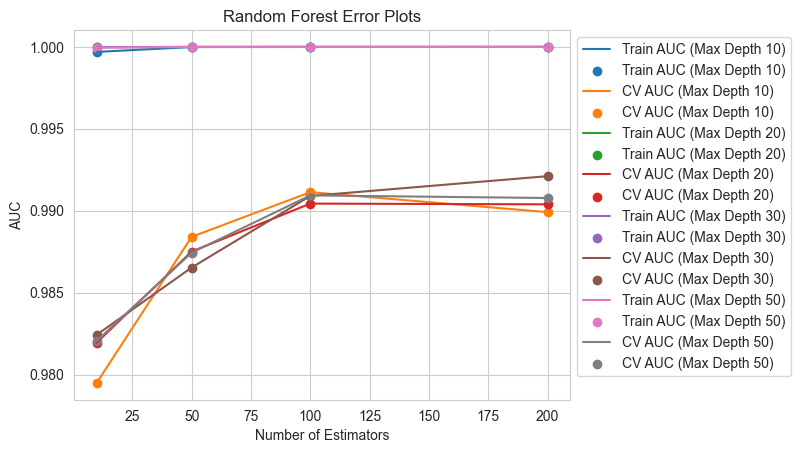

['D:\\z_DL\\NLP\\Text-classification-Sentiment-Analysis-using-BERT\\Weights\\best_model_rf.joblib']

In [82]:
# Usage example:
n_estimators_list = [10, 50, 100, 200]  # Adjust the list as needed
max_depth_list = [10, 20, 30, 50]  # Adjust the list as needed, use None for no maximum depth

best_rf_model = Train_RF_data(embeddings_train, y_train, embeddings_cv, y_cv, n_estimators_list, max_depth_list, n_iter=10)

# Save the best model to the specified location
model_save_path = os.path.join(BASE_FOLDER, "best_model_rf.joblib")
joblib.dump(best_rf_model, model_save_path)

### Test our RF model on the unseen data 

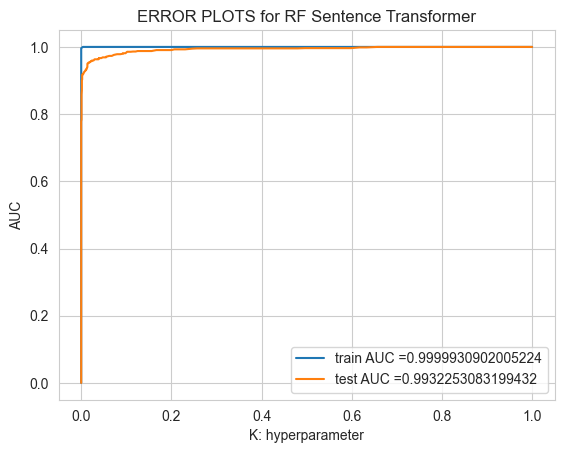

AUC RF:  0.9932253083199432
Train confusion matrix
[[1883    0]
 [   7 1876]]
Test confusion matrix
[[1351   33]
 [  56 1329]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1384
           1       0.98      0.96      0.97      1385

    accuracy                           0.97      2769
   macro avg       0.97      0.97      0.97      2769
weighted avg       0.97      0.97      0.97      2769



In [147]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def Test_RF_data(X_train, y_train,X_test,y_test,vectorizer,algorithm): 
    neigh = joblib.load(os.path.join(BASE_FOLDER, "best_model_rf.joblib"))
    #rf_predicted = rf_model.predict(embeddings_test)

    train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

    sns.set_style("whitegrid");
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title(f"ERROR PLOTS for RF {vectorizer}")
    plt.show()

    print("="*100)
    
    print("AUC RF: ",str(auc(test_fpr, test_tpr)))
    table.add_row([vectorizer, algorithm, '', str(auc(test_fpr, test_tpr))])
    from sklearn.metrics import confusion_matrix
    print("Train confusion matrix")
    print(confusion_matrix(y_train, neigh.predict(X_train)))
    print("Test confusion matrix")
    
    pred_labels = neigh.predict(X_test)
    print(confusion_matrix(y_test, pred_labels))
    
    f1 = f1_score(test_label,pred_labels)
    
    print()
    print("Classification Report")
    print(classification_report(y_test, pred_labels, labels=[0, 1]))
    
    
Test_RF_data(embeddings_train, y_train, embeddings_test, y_test, vectorizer="Sentence Transformer", algorithm="RandomForest")

## DBERT Model

In [117]:
#Unique class labels
max_len=64  #Max sentence length
num_classes = len(y_train.unique())
print(num_classes)

#Defining the loss function we would like to use
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=4e-5)


def create_bert_model():
    dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

    # Define input layers
    input_ids_layer  = Input(shape = (max_len,),  name='input_ids',  dtype='int64')
    input_attention_layer = Input(shape = (max_len,),  name='input_attention', dtype='int64')
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = dbert_model(input_ids_layer, attention_mask=input_attention_layer )[0]
    
    # We only care about DistilBERT's output for the [CLS] token, which is located
    # at index 0.  Splicing out the [CLS] tokens gives us 2D data
    cls_token = last_hidden_state[:, 0, :]

    dense = Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(cls_token)
    dropout1= Dropout(0.3)(dense)

    dense = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dropout1)
    dropout2= Dropout(0.3)(dense)
    
    # Define a single node that makes up the output layer (for binary classification)
    pred = Dense(num_classes, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(dropout2)
    
    model = tf.keras.Model(inputs=[input_ids_layer,input_attention_layer], outputs=pred)
    model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
    print(model.summary())
    return model


log_dir='dbert_model'

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import time


BASE_FOLDER = os.path.join(home_folder, "Weights")
os.makedirs(BASE_FOLDER, exist_ok=True)
model_save_path='./dbert_model.h5'


#https://keras.io/api/callbacks/
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=BASE_FOLDER  + '/seg_' +  
                                                'weights.best.hdf5',save_weights_only=True,
                                                monitor='val_loss',mode='min',save_best_only=True),
            tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir=log_dir)]


def display_training_loss_and_accuracy(iteration, history):
    
    title1 = 'model accuracy for iteration :' + str(iteration)
    title2 = 'model loss for iteration :' + str(iteration)
    plt.figure(figsize=(20,4))
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epoch_count,history.history['accuracy'])
    plt.plot(epoch_count,history.history['val_accuracy'])
    plt.title(title1)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(epoch_count,history.history['loss'])
    plt.plot(epoch_count,history.history['val_loss'])
    plt.title(title2)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

2


In [46]:
# Hyper parameters
#evaluate_every = 200 # interval for evaluating on one-shot tasks
batch_size = 32
epochs = 10
stepsforepoch = 16
#n_iter = 20000 # No. of training iterations
n_iter = 10 # No. of training iterations
N_way = 20 # how many persons for testing one-shot tasks
best = -1

def train_bert_model(train_inp,train_mask,train_label,cv_inp,cv_mask,cv_label ):

  model=create_bert_model()
  print("Starting training process!")
  print("-------------------------------------")
  t_start = time.time()
  history_list = []
  for i in range(n_iter):
      print("Iteration # : " , i)
      
      history = model.fit([train_inp,train_mask],train_label, 
                            batch_size=batch_size,
                            steps_per_epoch=stepsforepoch, 
                            epochs=epochs,
                            verbose=1,
                            callbacks=callbacks, 
                            validation_data=([cv_inp,cv_mask],cv_label),
                            validation_steps=10, 
                            validation_freq=1)
    
      history_list.append(history)
  
  print(history_list[0].history)
  for i in  range(len(history_list)):
      history = history_list[i]
      display_training_loss_and_accuracy(i, history)
  #model=create_bert_model()
  #history=model.fit([train_inp,train_mask],train_label,batch_size=32,epochs=3, validation_data=([cv_inp,cv_mask],cv_label),callbacks=callbacks)
 

### Training the BERT MODEL,<font color='red'> SET 3</font>

loading configuration file config.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.33.1",
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\model.safetensors
Loaded 66,362,880 parameters in the TF 2.0 model.
Some weights of the PyTorch model were not used when initializi

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 64)]                 0         []                            
                                                                                                  
 input_attention (InputLaye  [(None, 64)]                 0         []                            
 r)                                                                                               
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 stilBertModel)              den_state=(None, 64, 768),   0          'input_attention[0][0]']     
                              hidden_states=None, atten                                       

16/16 [==============================] - 36s 2s/step - loss: 2.8916 - accuracy: 0.9922 - val_loss: 3.3239 - val_accuracy: 0.9031
Epoch 8/10
16/16 [==============================] - 35s 2s/step - loss: 2.8502 - accuracy: 0.9880 - val_loss: 3.0138 - val_accuracy: 0.9563
Epoch 9/10
16/16 [==============================] - 34s 2s/step - loss: 2.8099 - accuracy: 0.9883 - val_loss: 3.0609 - val_accuracy: 0.9281
Epoch 10/10
16/16 [==============================] - 36s 2s/step - loss: 2.7448 - accuracy: 0.9980 - val_loss: 2.8865 - val_accuracy: 0.9625
Iteration # :  4
Epoch 1/10
16/16 [==============================] - 35s 2s/step - loss: 2.7002 - accuracy: 0.9961 - val_loss: 2.9639 - val_accuracy: 0.9500
Epoch 2/10
16/16 [==============================] - 35s 2s/step - loss: 2.6448 - accuracy: 1.0000 - val_loss: 2.8462 - val_accuracy: 0.9594
Epoch 3/10
16/16 [==============================] - 34s 2s/step - loss: 2.6054 - accuracy: 0.9980 - val_loss: 3.0128 - val_accuracy: 0.9187
Epoch 4/10
16

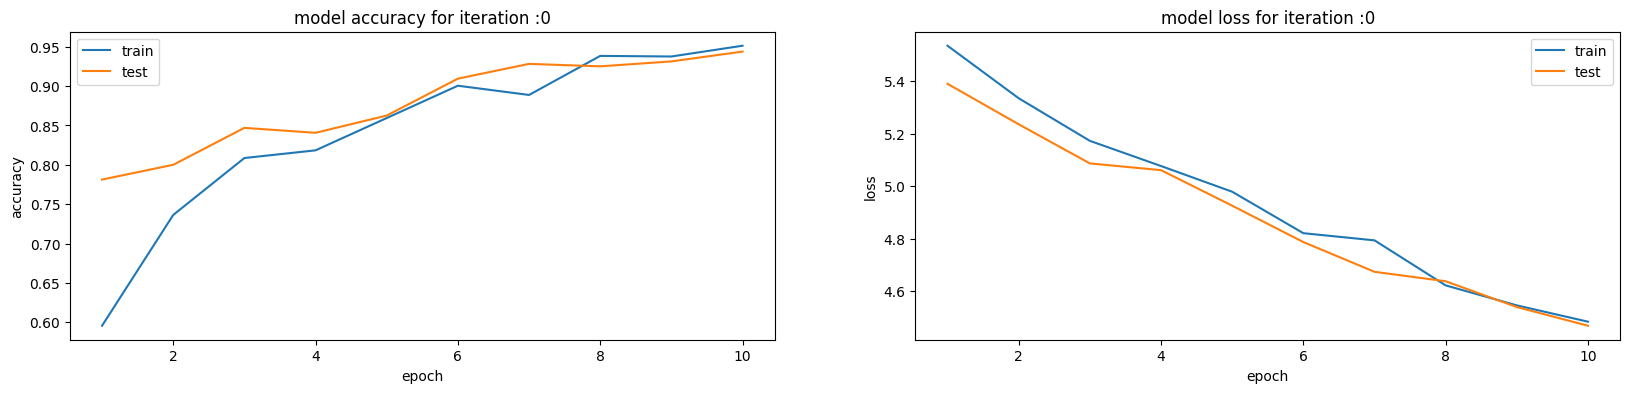

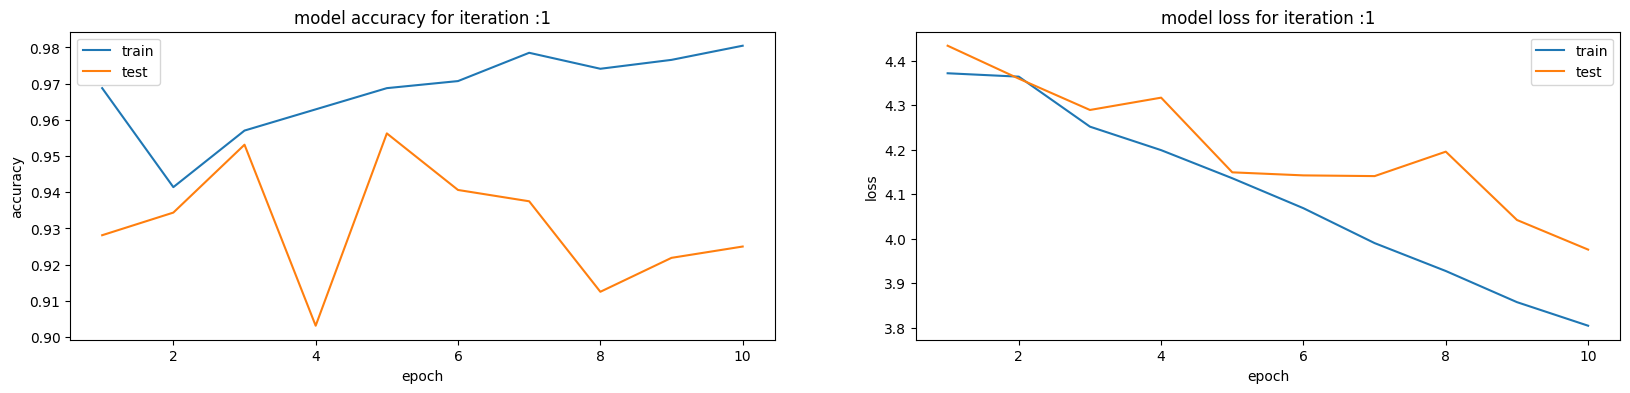

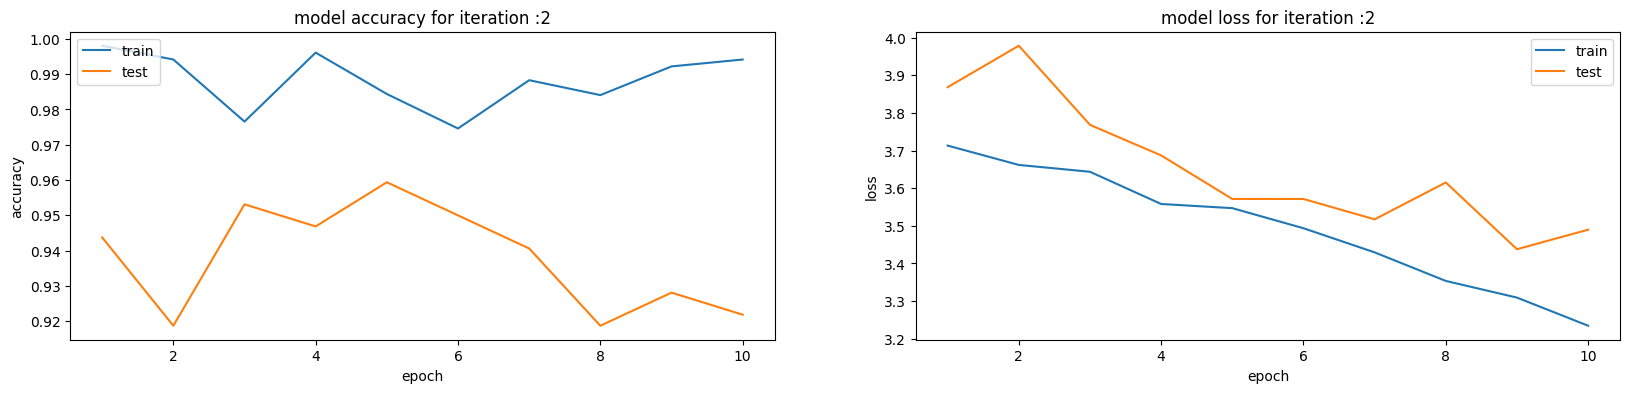

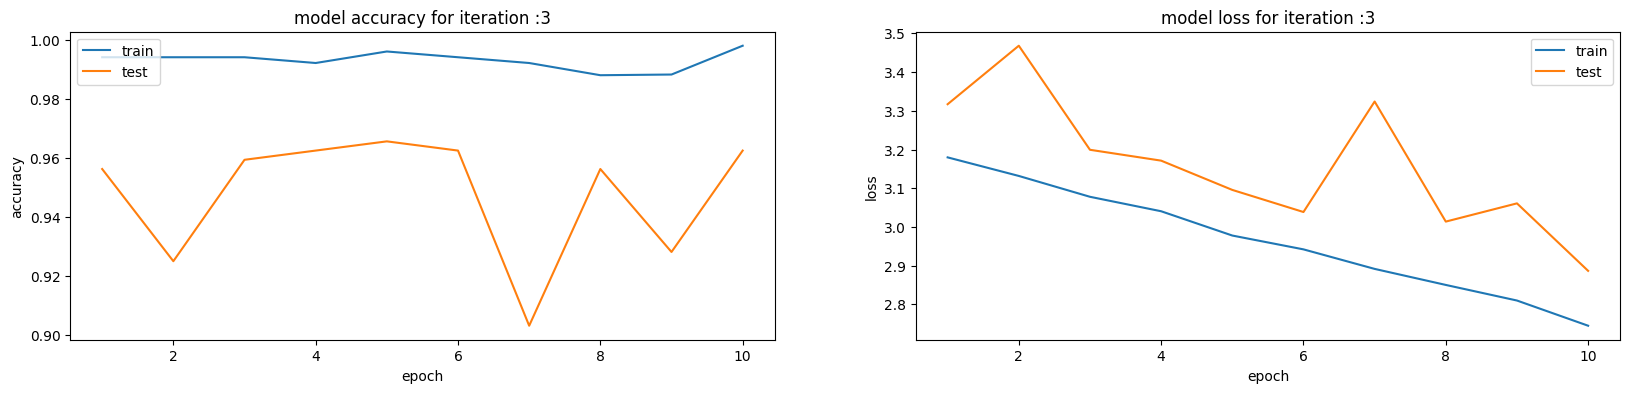

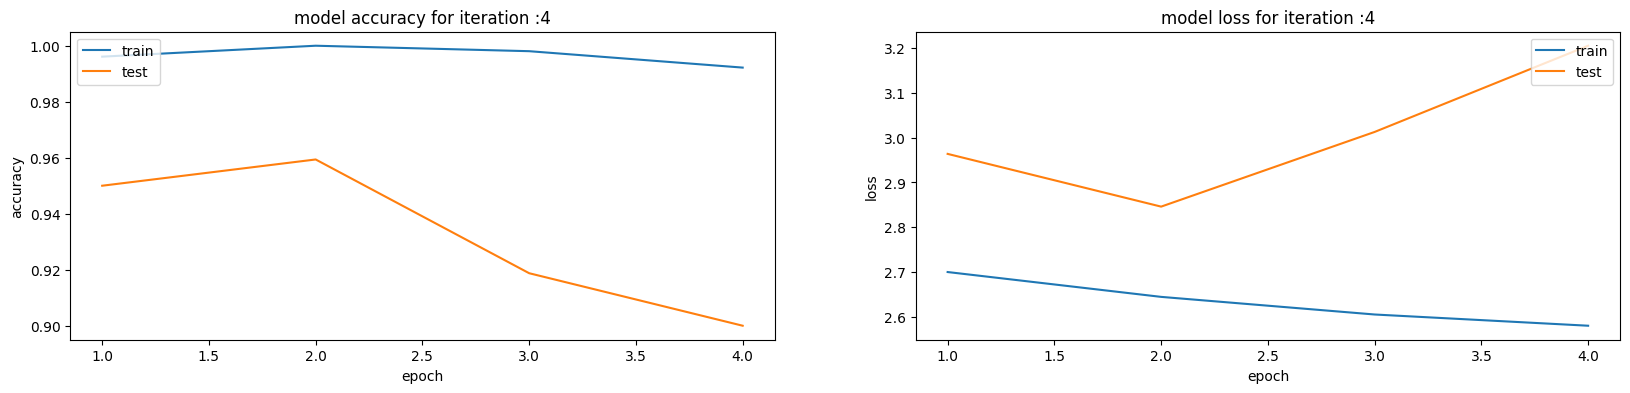

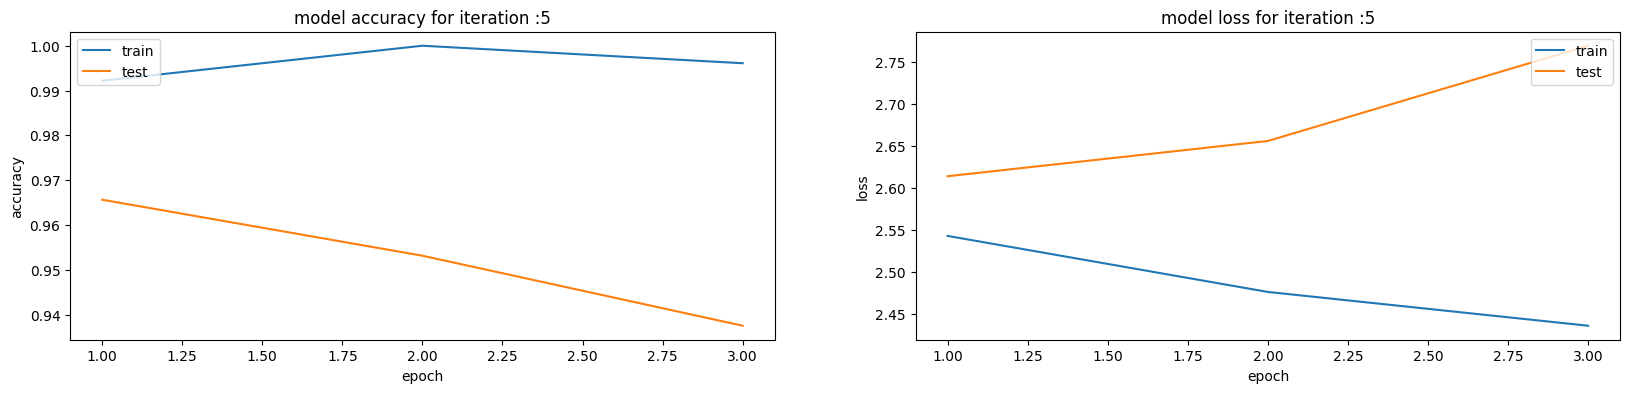

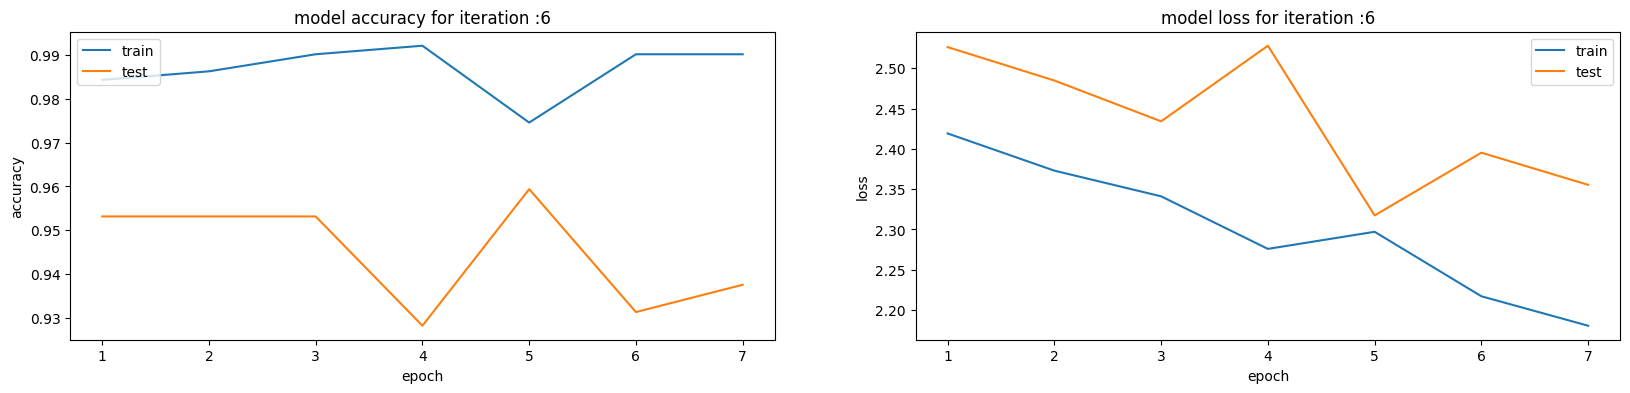

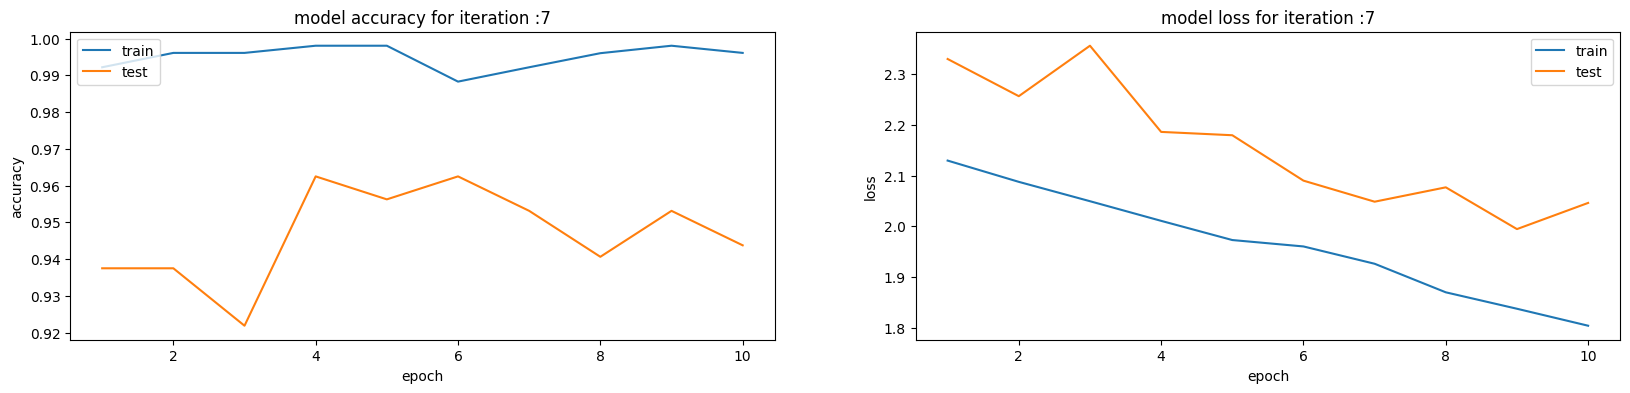

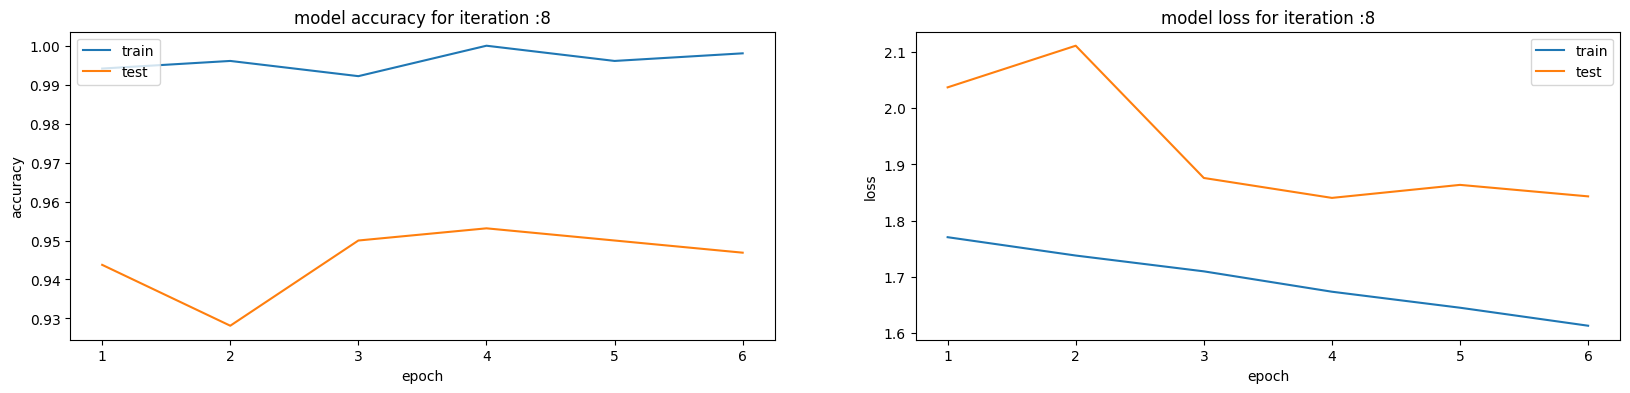

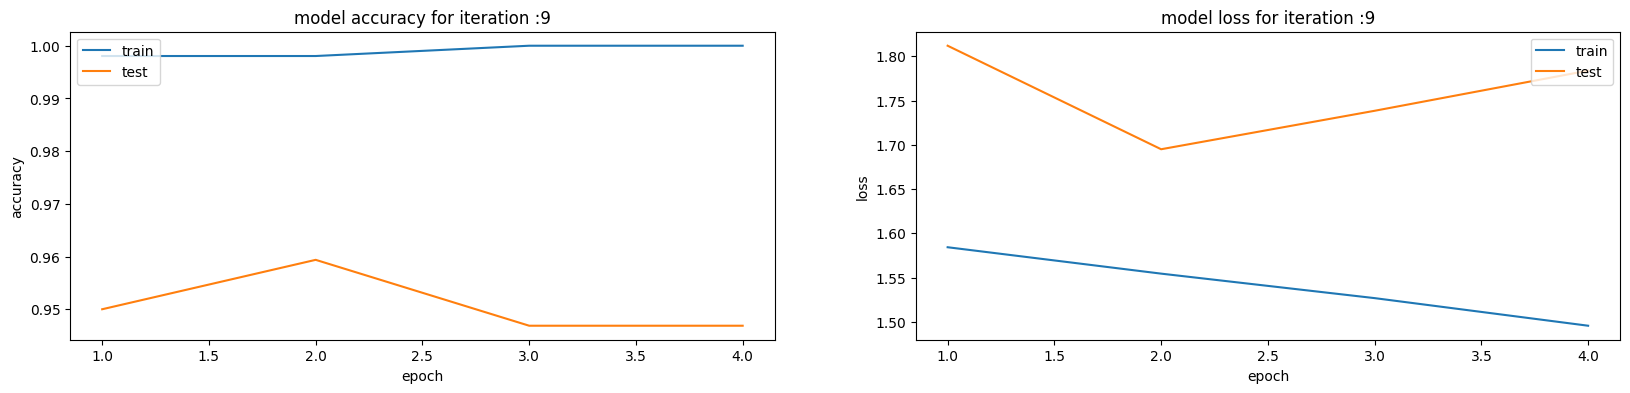

In [47]:
train_bert_model(train_inp,train_mask,train_label,cv_inp,cv_mask,cv_label)

### Test our BERT model on the unseen data 

In [148]:
# Load model weights with trained model weights
model=create_bert_model()
model.load_weights(os.path.join(BASE_FOLDER, "seg_weights.best.hdf5"))

y_pred_keras = model.predict([test_inp,test_mask])
keras_pred_labels = y_pred_keras.argmax(axis=1)

loading configuration file config.json from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.33.1",
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at C:\Users\padma/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\model.safetensors
Loaded 66,362,880 parameters in the TF 2.0 model.
Some weights of the PyTorch model were not used when initializi

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 64)]                 0         []                            
                                                                                                  
 input_attention (InputLaye  [(None, 64)]                 0         []                            
 r)                                                                                               
                                                                                                  
 tf_distil_bert_model_6 (TF  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 DistilBertModel)            den_state=(None, 64, 768),   0          'input_attention[0][0]']     
                              hidden_states=None, atten                                     

**Plotting F1 score , confusion matrix for the test data** 

F1 score 0.9627773801002147

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1384
           1       0.95      0.97      0.96      1385

    accuracy                           0.96      2769
   macro avg       0.96      0.96      0.96      2769
weighted avg       0.96      0.96      0.96      2769

Confusion matrix
[[1320   64]
 [  40 1345]]


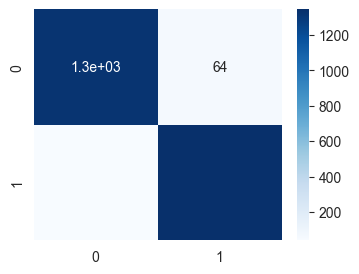

In [149]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_label,pred_labels):
    f1 = f1_score(test_label,pred_labels)
    print('F1 score',f1)
    print()
    print('Classification Report')
    print(classification_report(test_label, pred_labels, labels=[0, 1]))

    print('Confusion matrix')
    print(confusion_matrix(test_label, pred_labels))

    labels = [0, 1]
    cm = confusion_matrix(test_label, pred_labels)
    index = columns = labels
    cm_df = pd.DataFrame(cm, columns=index, index=columns)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, cmap='Blues')
    
plot_confusion_matrix(test_label,keras_pred_labels)

**Plotting AUC for the test data**

auc_keras ::  0.9624381795037666


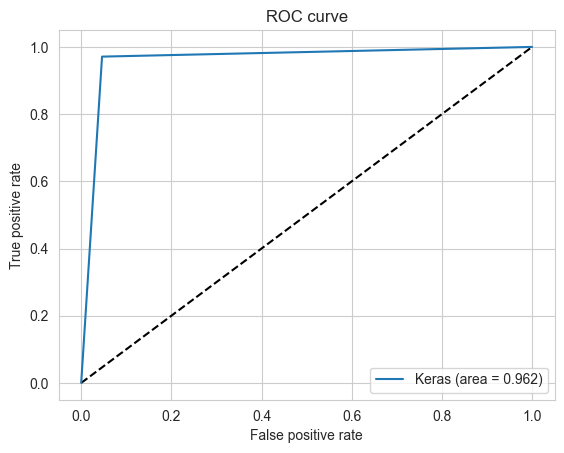

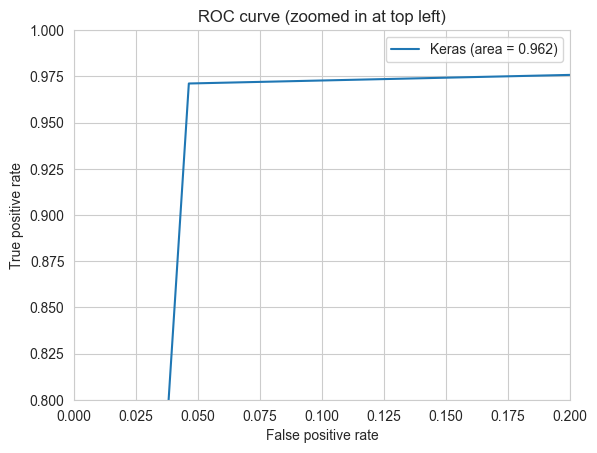

In [150]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
def plot_auc(test_label,pred_labels):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, pred_labels)
    auc_keras = auc(fpr_keras, tpr_keras)
    print("auc_keras :: ",str(auc_keras))
    table.add_row(['BERT Tokenizer', 'BERT', '', str(auc_keras)])
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    # Zoom in view of the upper left corner.
    plt.figure(2)
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (zoomed in at top left)')
    plt.legend(loc='best')
    plt.show()

plot_auc(test_label,keras_pred_labels)

# Conclusions

In [151]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
print(table)

+----------------------+--------------+-----------------+--------------------+
|      Vectorizer      |    Model     | Hyper parameter |        AUC         |
+----------------------+--------------+-----------------+--------------------+
|        TFIDF         |   kd_tree    |        61       | 0.8757418459548005 |
| Sentence Transformer |   kd_tree    |        81       | 0.930793910811544  |
| Sentence Transformer | RandomForest |                 | 0.9932253083199432 |
|    BERT Tokenizer    |     BERT     |                 | 0.9624381795037666 |
+----------------------+--------------+-----------------+--------------------+



<b> 1. Baseline Model with TF-IDF: </b>

We began by tokenizing the data using TF-IDF and trained it with the K-Nearest Neighbors (KNN) KDTree model. This established a strong baseline for our analysis.

<b> 2. Sentence Transformer Tokenization: </b>

Building upon the baseline, we employed Sentence Transformer Tokenization and trained the tokenized data with both RandomForest (RF) and K-Nearest Neighbors (KNN) KDTree models. This allowed us to explore the performance of more advanced tokenization techniques and machine learning models.

<b> 3. BERT-Tokenized and Fine-Tuned Data: </b>

For a more advanced approach, we leveraged BERT-tokenized data, fine-tuned it using a pretrained DistilBERT model, and conducted a comprehensive evaluation of its performance. This represented the most sophisticated aspect of our analysis.

<b> 4. Model Training and Evaluation:  </b>

We meticulously trained our models using the respective tokenized datasets and assessed their performance on unseen test data. This comprehensive evaluation process included the calculation of various metrics to gauge the models' effectiveness.

<b> 5. Outstanding RandomForest Model:  </b>

Our evaluation revealed that the RandomForest (RF) model with SentenceTransformer tokenized data achieved an exceptional AUC score of approximately 99%. This remarkable performance underscores its suitability for the task at hand, particularly when dealing with imbalanced data.

NOTE: AUC is a crucial metric in such scenarios as it assesses the model's ability to accurately classify positive and negative instances, providing a more comprehensive measure of performance in situations where class distribution is skewed.